<a href="https://colab.research.google.com/github/prammmoe/logistic-regression/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION - HEART DISEASE PREDICTION

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

# Data Preparation

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 39.2MB/s]


In [6]:
!unzip heart-disease-prediction-using-logistic-regression

Archive:  heart-disease-prediction-using-logistic-regression.zip
  inflating: framingham.csv          


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Preprocessing

In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [25]:
data_train, data_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 42)
print(len(data_test), len(data_train), sep="\n")

848
3390


In [26]:
from sklearn.impute import SimpleImputer

imp_mean_train = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean_test = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean_train.fit(data_train)
imp_mean_test.fit(data_test)

data_train = imp_mean_train.transform(data_train)
data_test = imp_mean_test.transform(data_test)

In [27]:
data_train = pd.DataFrame(data_train, columns=df.columns)
data_test = pd.DataFrame(data_test, columns=df.columns)

In [28]:
data_train.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [75]:
data_test.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [74]:
data_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,40.0,4.0,1.0,30.0,0.0,0.0,0.0,0.0,205.0,131.0,81.0,23.74,66.0,87.0,0.0
1,0.0,57.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,250.0,152.5,92.5,32.31,75.0,94.0,0.0
2,0.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,123.0,71.0,26.98,83.0,73.0,0.0
3,1.0,41.0,2.0,1.0,30.0,0.0,0.0,0.0,0.0,228.0,113.0,82.5,25.67,67.0,70.0,0.0
4,0.0,64.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,232.0,149.5,84.0,20.49,68.0,96.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.0,36.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,222.0,147.0,94.0,26.79,76.0,71.0,0.0
3386,0.0,57.0,3.0,1.0,15.0,0.0,0.0,0.0,0.0,250.0,125.0,74.0,21.08,80.0,72.0,0.0
3387,0.0,60.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,298.0,133.0,89.0,25.09,83.0,81.0,0.0
3388,1.0,39.0,2.0,1.0,10.0,0.0,0.0,0.0,0.0,215.0,102.0,64.5,24.50,68.0,62.0,0.0


In [66]:
x_train = data_train.drop('TenYearCHD', axis=1)
y_train = data_train["TenYearCHD"]

x_test = data_test.drop('TenYearCHD', axis=1)
y_test = data_test['TenYearCHD']

scaling_columns = x_train.columns

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[x_train.columns] = scaler.fit_transform(x_train[scaling_columns])
x_test[x_test.columns] = scaler.fit_transform(x_test[scaling_columns])

# Train Model and Prediction

In [52]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

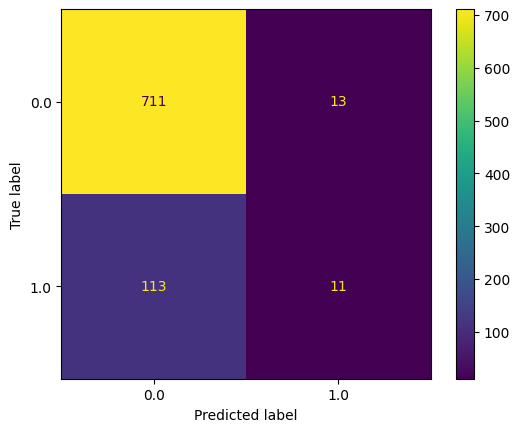

In [65]:
classes = np.unique(y_test)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [55]:
from sklearn.metrics import accuracy_score
print('Accuracy =' ,accuracy_score(y_test,y_pred))

Accuracy = 0.8514150943396226
